# EDA

### Imports

In [1]:
# standard library imports
import os
import re

# third party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# make it pretty
plt.style.use("ggplot")

### Get matplotlib style color cycle

In [2]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

### Helper functions to tidy review text

In [3]:
def fix_trailing_punc(rev: str) -> str:
    # add trailing punctuation if missing
    if rev[-1] not in ('.', '!', '?'):
        rev = rev + '.'
    return rev

def fix_punc_whitespace(rev: str) -> str:
    # fix sentence endings lacking trailing whitespace
    return re.sub(r"\?(?=[A-Za-z])", "? ", 
                re.sub(r"\!(?=[A-Za-z])", "! ", 
                    re.sub(r"\.(?=[A-Za-z])", ". ", rev)))

### Load reviews data

In [4]:
df = pd.read_csv(os.path.join("..", "data", "reviews.csv"))

### Apply tidying functions

In [5]:
df["comment"] = df["comment"].apply(fix_trailing_punc)
df["comment"] = df["comment"].apply(fix_punc_whitespace)

### Check data types and nulls

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20647 entries, 0 to 20646
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stars     20647 non-null  float64
 1   comment   20647 non-null  object 
 2   book_url  20647 non-null  object 
dtypes: float64(1), object(2)
memory usage: 484.0+ KB


### Plot distribution of stars

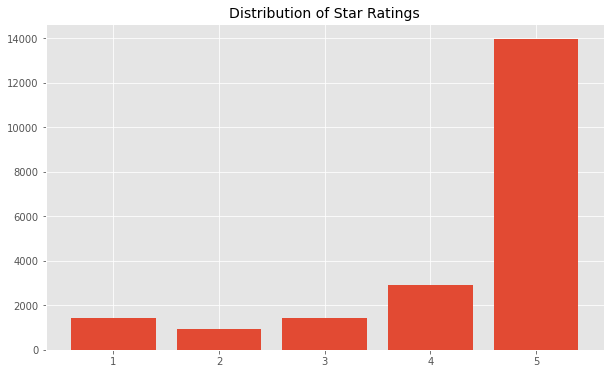

In [7]:
stars = df["stars"].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(x=stars.index, height=stars, color=colors[0])
plt.title("Distribution of Star Ratings", fontsize=14);

### Plot lenght of reviews in characters

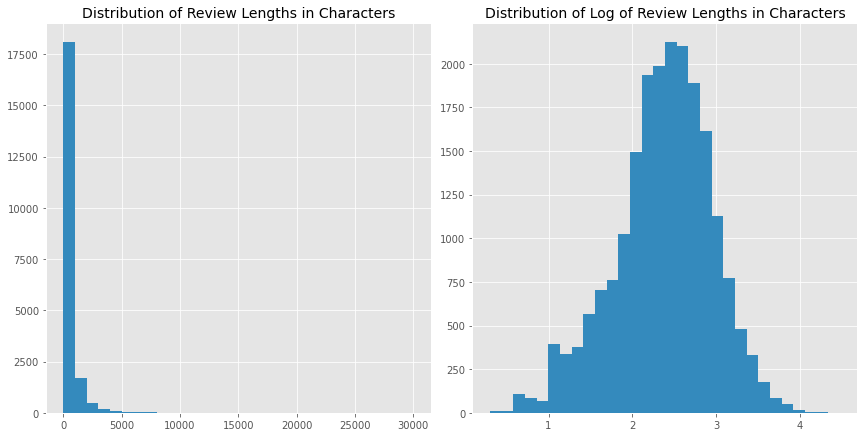

In [8]:
lengths = df["comment"].str.len()
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.tight_layout()
axs[0].hist(lengths, bins=30, color=colors[1])
axs[0].set_title("Distribution of Review Lengths in Characters", fontsize=14)
axs[1].hist(np.log10(lengths), bins=30, color=colors[1])
axs[1].set_title("Distribution of Log of Review Lengths in Characters", fontsize=14);

### Aggregate reviews by book URL

In [9]:
agg_df = df.groupby("book_url").agg({"stars": ["mean", "count"], "comment": " ".join}).reset_index()
agg_df.columns = agg_df.columns.to_flat_index()
agg_df.columns = ["book_url", "avg_stars", "n_reviews", "concat_reviews"]
agg_df.head(10)

,book_url,avg_stars,n_reviews,concat_reviews
0,https://www.amazon.com/dp/0062842668,4.311111,90,"Update Mar 2, 2019: See my update below, now t..."
1,https://www.amazon.com/dp/0063001691,4.588889,90,Michael Shellenberger was on track to be the p...
2,https://www.amazon.com/dp/0071154671,4.233333,60,This book is really good for an introduction t...
3,https://www.amazon.com/dp/0071807594,4.347826,46,I can honestly say that Randy Bartlett's book ...
4,https://www.amazon.com/dp/0071829598,4.250000,12,Book is really helpful but I cant find equipme...
5,https://www.amazon.com/dp/0072472278,4.130435,23,"Simply put, not as clear as John Taylor's erro..."
6,https://www.amazon.com/dp/0081029977,4.000000,1,Too basic.
7,https://www.amazon.com/dp/0122063821,4.833333,6,This is one of the best written books I have s...
8,https://www.amazon.com/dp/0122673514,4.333333,21,"This is a very didactic book, covering the bas..."
9,https://www.amazon.com/dp/0123743699,4.920000,25,Danette - I purchased your book in late Decemb...


### Plot distribution of review counts

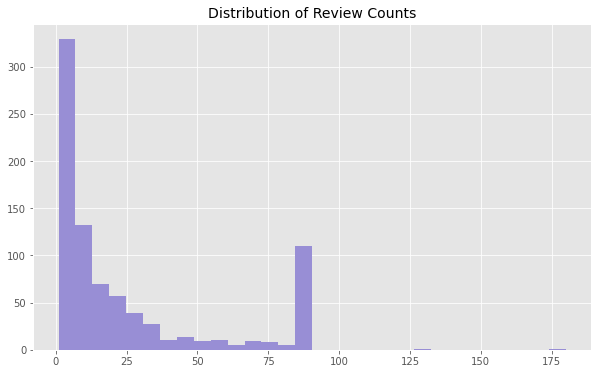

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(agg_df["n_reviews"], bins=30, color=colors[2])
plt.title("Distribution of Review Counts", fontsize=14);

### Sort by `avg_stars`

In [11]:
sort_stars = agg_df.sort_values("avg_stars", ascending=False).reset_index()
sort_stars.head(10)

,index,book_url,avg_stars,n_reviews,concat_reviews
0,542,https://www.amazon.com/dp/1619306816,5.0,1,great information! interesting activities.
1,659,https://www.amazon.com/dp/3662498502,5.0,4,"Great book, perfect balance between theory and..."
2,654,https://www.amazon.com/dp/3319790684,5.0,3,“Making Healthcare Green” is not only a worthw...
3,751,https://www.amazon.com/dp/B07CTS6VWW,5.0,13,An excellent overview of ten very important bu...
4,114,https://www.amazon.com/dp/0295965231,5.0,1,Meg Strathmann (and her colleagues) put togeth...
5,747,https://www.amazon.com/dp/B07BR748VM,5.0,1,This book is an excellent introduction to the ...
6,214,https://www.amazon.com/dp/0750678410,5.0,7,If you're doing circuit and system design invo...
7,388,https://www.amazon.com/dp/1452235279,5.0,5,"Omg, I LOOOVE this book. Great content on surv..."
8,307,https://www.amazon.com/dp/1138035114,5.0,3,Like the 1st edition – it is a recommended fir...
9,308,https://www.amazon.com/dp/1138035483,5.0,1,This book gives some very helpful tips on how ...


In [12]:
sort_stars.tail(10)

,index,book_url,avg_stars,n_reviews,concat_reviews
826,625,https://www.amazon.com/dp/1950656047,1.0,1,This has nothing to do with the seller or fulf...
827,798,https://www.amazon.com/dp/B0829FDZJZ,1.0,1,This appears to be a self-published audio book...
828,737,https://www.amazon.com/dp/B076LR89TD,1.0,1,The paperback edition has a very poor binding ...
829,20,https://www.amazon.com/dp/0128021012,1.0,2,Book binding in poor condition with beginning ...
830,336,https://www.amazon.com/dp/1284184064,1.0,1,"The ""New Natural Law"", ""Detractors claim that ..."
831,617,https://www.amazon.com/dp/1946872040,1.0,1,Wasn't exactly what we were looking for. Does...
832,419,https://www.amazon.com/dp/1484242661,1.0,1,"This book provides minimal introductions, cont..."
833,470,https://www.amazon.com/dp/1498763936,1.0,1,Amazon has been notified.
834,580,https://www.amazon.com/dp/1788290674,1.0,2,I purchased three books on statistics (this be...
835,772,https://www.amazon.com/dp/B07QJSKZTN,1.0,3,I don't know about the overall quality of cont...


### Filter to books with at least 50 reviews

In [13]:
mask = agg_df["n_reviews"] >= 50
filt_sort_stars = agg_df.loc[mask, :].sort_values("avg_stars", ascending=False).reset_index(drop=True)
filt_sort_stars.head(10)

,book_url,avg_stars,n_reviews,concat_reviews
0,https://www.amazon.com/dp/B0816SPG7X,4.955556,90,2nd book in the series (hopefully many more to...
1,https://www.amazon.com/dp/1541645634,4.944444,90,"Thomas Sowell's latest book is an excellent, s..."
2,https://www.amazon.com/dp/0735611319,4.866667,90,"Seriously, if you are the kind of person who n..."
3,https://www.amazon.com/dp/0997994886,4.861538,65,Хорошо. Вот оставьте на все три книги:Got seve...
4,https://www.amazon.com/dp/0321751043,4.844444,90,I bought this for my son as a gift. He just g...
5,https://www.amazon.com/dp/1907797467,4.844444,90,You know the great nutrition debate on dietary...
6,https://www.amazon.com/dp/0749481544,4.833333,72,This book explains Data Science with the lens ...
7,https://www.amazon.com/dp/0815342209,4.822222,90,"With the name Weinberg on the book, you will g..."
8,https://www.amazon.com/dp/1617291382,4.813559,59,A comprehensive overview of basic structures o...
9,https://www.amazon.com/dp/1600490069,4.811111,90,For beginners:A. For somewhat theoretical appr...


In [14]:
filt_sort_stars.tail(10)

,book_url,avg_stars,n_reviews,concat_reviews
146,https://www.amazon.com/dp/B07VL5TCVF,3.689655,87,"Donald is an incredible person, scientist, spe..."
147,https://www.amazon.com/dp/1589484568,3.679245,53,This textbook leaves a lot to be desired as fa...
148,https://www.amazon.com/dp/0123814790,3.545455,55,It looks like a great book; I read the Kindle ...
149,https://www.amazon.com/dp/0134133536,3.433333,60,"Came fast, and it’s way better than buying a b..."
150,https://www.amazon.com/dp/0262035618,3.288889,90,This is not a coding book. I see a lot of nega...
151,https://www.amazon.com/dp/0534399428,3.149254,67,I'm a junior at UCBerk who took a comprehensiv...
152,https://www.amazon.com/dp/0134135369,2.942029,69,STUDENTS BEWARE!!!! The item title of this te...
153,https://www.amazon.com/dp/1526436566,2.784314,51,No!!! So distracting. I get the idea of making...
154,https://www.amazon.com/dp/B07NJCG1XS,2.766667,90,"As one reviewer mentioned, the Interlude and t..."
155,https://www.amazon.com/dp/B0007OB40E,2.700000,90,The book helped me understand the following:1....


### Save aggregated data

In [15]:
filt_sort_stars.to_csv(os.path.join("..", "data", "concat_reviews.csv"), index=False)